# An example of a typical data pipeline in neuroscience

In [1]:
import numpy as np
import pylab as pl
%matplotlib inline

## 1) Loading and plotting the data

First, we have to load the data from a directory. This specific file contains voltage values as function of time. What is measured is the voltage value close to an electrically active cells, a brain cell, as a function of time. The data format is raw text and the sampling is done at 50 mus per voltage value

In [2]:
Vtrace = np.loadtxt('./data/john_experiment_0.dat')
tbins = np.arange(0, 60, 0.00005) # 1 min recording with 50mu s sampling

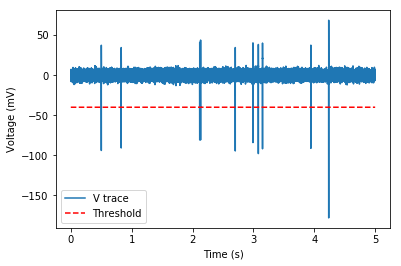

In [3]:
pl.plot(tbins[0:100000], Vtrace[0:100000], label = 'V trace')
threshold = -40
pl.plot(tbins[0:100000], np.ones(100000)*threshold, '--r', label = 'Threshold')
pl.xlabel('Time (s)')
pl.ylabel('Voltage (mV)')
pl.legend()

The data shows a measurement of a voltage as function of time. In addition to a noisy baseline, there are sharp peaks visible. These so-called spikes constitute the fundamental unit of electrical activity of nerve cells. The rest of this notebook is concerned with the extraction and analysis of these spikes.

## 2) Extracting spikes: the central object in the dataset

The simplest method to identify spikes in a dataset is thresholding the numbers, and identifying the timepoints where the voltage exceeded some threshold. Here is is set to -40, but this number can be found automatically, e.g. by setting it to -np.std(Vtrace).

Text(0, 0.5, 'Voltage (mV)')

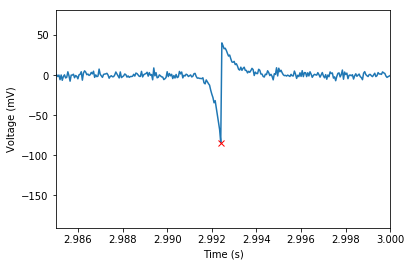

In [4]:
above = (Vtrace < threshold)
spikes = above[1:] < above[0:-1]

spikeTimes = tbins[np.where(spikes)]
spikeVoltages = Vtrace[np.where(spikes)]

pl.plot(tbins, Vtrace, spikeTimes, spikeVoltages, 'xr')
pl.xlim([2.985, 3.0])
pl.xlabel('Time (s)')
pl.ylabel('Voltage (mV)')

The plot shows a typical spike: a short biphasic voltage pulse about 2ms long.

Now that the spiketimes [i.e. the times when a spike occured] have been saved, we can study some of their statistical properties.

## 3) Spike time analysis

First, let's look at the inter-spike intervals, i.e. the distribution of waiting times between two of these events.

Text(0, 0.5, 'Frequency')

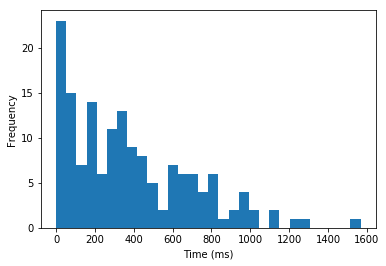

In [5]:
ISI = np.diff(spikeTimes)
ISIhist = pl.hist(ISI*1000, 30)
pl.xlabel('Time (ms)')
pl.ylabel('Frequency')

As final results of this pipeline, we fit a model to this distribution, and print the fit parameters. The model is a log-normal distribution, i.e. a fit with an Gaussian to the logairhtms of the interspike intervals.

In [6]:
import scipy.optimize as opt
import scipy as sc

def normpdf(x, mu, sd, denom):
    num = np.exp(-(x-mu)**2/(2*sd*sd))
    return num/denom

probabilities = ISIhist[0]/np.sum(ISIhist[0])
distance_between_spikes = ISIhist[1][:-1]

popt, pcov = opt.curve_fit(normpdf, np.log(distance_between_spikes), probabilities)
print(popt)


[0.79507444 2.83046037 5.08225159]


In [7]:
data_fitted = normpdf(np.log(distance_between_spikes), *popt)

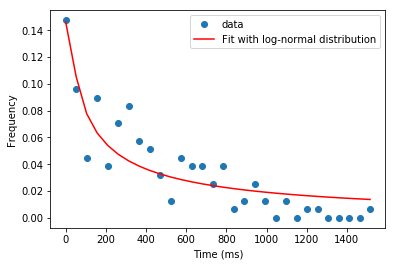

In [8]:
pl.plot(distance_between_spikes,probabilities,'o', label = 'data')
pl.plot(distance_between_spikes, data_fitted,'r-', label = 'Fit with log-normal distribution')
pl.xlabel('Time (ms)')
pl.ylabel('Frequency')
pl.legend()

This modelpipeline ends here. We have ingested the raw data, identified spikes, calculated the inter spike intervals, and fitted a model function to it. In the remaining exercise, we will translate this pipeline into one of the standard forms in neuroscience.

In [9]:
# Task 1 (a), by Lili Feng
import scipy.special

def poissonpdf(x, mu, denom):
    num = np.exp(-mu)*(mu**x)/scipy.special.factorial(x)
    return num/denom


probabilities = ISIhist[0]/np.sum(ISIhist[0])
distance_between_spikes = np.round(ISIhist[1][:-1])
# discard the distance_between_spikes[0]
probabilities           = probabilities[1:]
distance_between_spikes = distance_between_spikes[1:]

popt, pcov = opt.curve_fit(poissonpdf, np.log(distance_between_spikes), probabilities)
print(popt)


[3.38292679 1.88910472]


In [10]:
data_fitted = poissonpdf(np.log(distance_between_spikes), *popt)

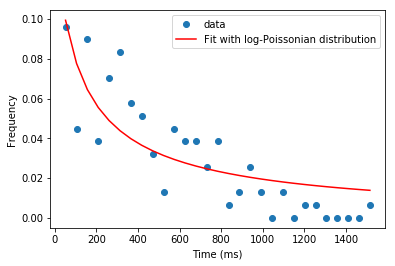

In [11]:
pl.plot(distance_between_spikes, probabilities,'o', label = 'data')
pl.plot(distance_between_spikes, data_fitted,'r-', label = 'Fit with log-Poissonian distribution')
pl.xlabel('Time (ms)')
pl.ylabel('Frequency')
pl.legend()
# End of Task 1 (a), by Lili Feng

In [12]:
# Task 1 (b), by Lili Feng
threshold = -5.*np.std(Vtrace) # define the new threshold

Text(0, 0.5, 'Voltage (mV)')

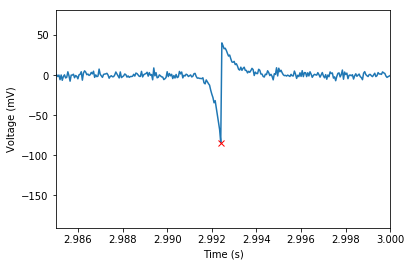

In [13]:
above = (Vtrace < threshold)
spikes = above[1:] < above[0:-1]

spikeTimes = tbins[np.where(spikes)]
spikeVoltages = Vtrace[np.where(spikes)]

pl.plot(tbins, Vtrace, spikeTimes, spikeVoltages, 'xr')
pl.xlim([2.985, 3.0])
pl.xlabel('Time (s)')
pl.ylabel('Voltage (mV)')

Text(0, 0.5, 'Frequency')

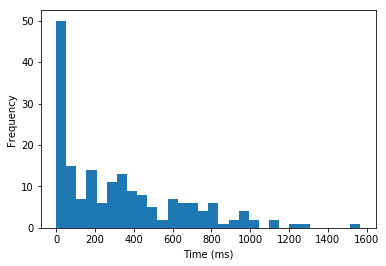

In [14]:
ISI = np.diff(spikeTimes)
ISIhist = pl.hist(ISI*1000, 30)
pl.xlabel('Time (ms)')
pl.ylabel('Frequency')

In [15]:
import scipy.special

def poissonpdf(x, mu, denom):
    num = np.exp(-mu)*(mu**x)/scipy.special.factorial(x)
    return num/denom


probabilities = ISIhist[0]/np.sum(ISIhist[0])
distance_between_spikes = np.round(ISIhist[1][:-1])
# discard the distance_between_spikes[0]
probabilities           = probabilities[1:]
distance_between_spikes = distance_between_spikes[1:]
popt, pcov = opt.curve_fit(poissonpdf, np.log(distance_between_spikes), probabilities)
print(popt)


[3.38281359 2.21597176]


/Users/leon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


In [16]:
data_fitted = poissonpdf(np.log(distance_between_spikes), *popt)

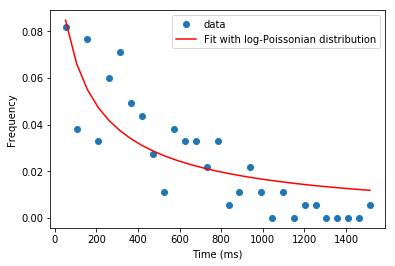

In [17]:
pl.plot(distance_between_spikes, probabilities,'o', label = 'data')
pl.plot(distance_between_spikes, data_fitted,'r-', label = 'Fit with log-Poissonian distribution')
pl.xlabel('Time (ms)')
pl.ylabel('Frequency')
pl.legend()
# End of Task 1 (b), by Lili Feng